In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import clip
from random import randint

In [2]:
def die_roll(num_sides, explode=True):
    result = randint(1, num_sides)
    if not explode:
        return result
    total = result
    while result == num_sides:
        result = randint(1, num_sides)
        total += result
    return total

In [3]:
def die_roll_with_wild_die(num_sides, wild_sides=6, modifier=0, explode=True):
    result = die_roll(num_sides, explode=explode)
    wild_result = die_roll(wild_sides, explode=explode)
    return max(result, wild_result) + modifier

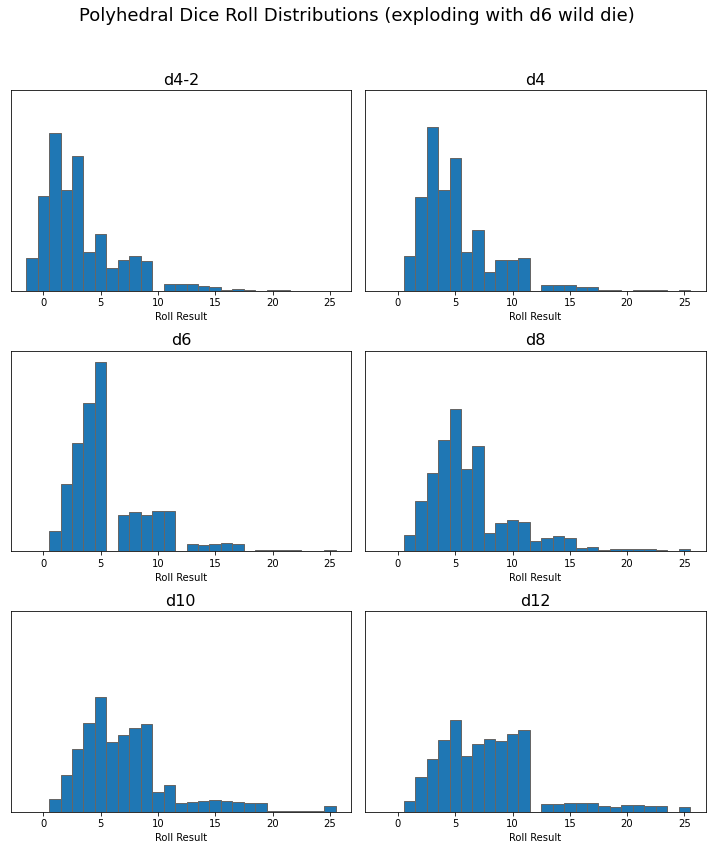

In [4]:
figure, axes = plt.subplots(3, 2, figsize=(10, 12))
dice = (4, 4, 6, 8, 10, 12)
modifiers = (-2, 0, 0, 0, 0, 0)
plt.suptitle("Polyhedral Dice Roll Distributions (exploding with d6 wild die)", fontsize=18)
for i, (die, mod) in enumerate(zip(dice, modifiers), 1):
    results = [die_roll_with_wild_die(die, modifier=mod) for _ in range(10000)]
    results = clip(results, -10, 25)
    plt.subplot(3, 2, i)
    plt.hist(results, bins=range(-1, 27), align="left", edgecolor="#666666")
    plt.xlabel("Roll Result")
    plt.ylim((0, 2600))
    plt.yticks([])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    title = f"d{die}"
    if mod:
        title += f"{mod}"
    plt.title(title, fontsize=16)
figure.savefig("dist.pdf")
figure.savefig("dist.jpg", dpi=150)

In [5]:
d4results = [die_roll_with_wild_die(4) for _ in range(20000)]
d6results = [die_roll_with_wild_die(6) for _ in range(20000)]
d8results = [die_roll_with_wild_die(8) for _ in range(20000)]

prob_tn6_d4 = sum([1 if r >= 6 else 0 for r in d4results]) / len(d4results)
prob_tn6_d6 = sum([1 if r >= 6 else 0 for r in d6results]) / len(d6results)
print(f"Probability of hitting TN=6 with d4: {prob_tn6_d4*100:.2f}%")
print(f"Probability of hitting TN=6 with d6: {prob_tn6_d6*100:.2f}%")

prob_tn8_d6 = sum([1 if r >= 8 else 0 for r in d6results]) / len(d6results)
prob_tn8_d8 = sum([1 if r >= 8 else 0 for r in d8results]) / len(d8results)
print(f"Probability of hitting TN=8 with d6: {prob_tn8_d6*100:.2f}%")
print(f"Probability of hitting TN=8 with d8: {prob_tn8_d8*100:.2f}%")

Probability of hitting TN=6 with d4: 32.02%
Probability of hitting TN=6 with d6: 30.80%
Probability of hitting TN=8 with d6: 26.02%
Probability of hitting TN=8 with d8: 24.55%
